In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

cricket = pd.read_csv('cricket.csv')
cricket.head()

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0.0,0,0,0,0,0.0,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0.0,0,0,0,0,0.0,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0.0,0,0,0,0,0.0,0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0.0,0,0,0,0,0.0,0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0.0,0,0,0,0,0.0,0,0,0,0


In [2]:
new_cricket = cricket[['Mat.x','Inns.x','Runs.x','HS','BF','X100','X4s','X50','X6s','Runs.y']]

In [3]:
CR = new_cricket.values
CR

array([[ 10,   9, 134, ...,   0,   8,   0],
       [ 12,  11, 480, ...,   6,  30,   0],
       [  3,   3,  63, ...,   0,   5,   0],
       ...,
       [  0,   0,   0, ...,   0,   0, 418],
       [  0,   0,   0, ...,   0,   0,  65],
       [  0,   0,   0, ...,   0,   0, 363]])

In [4]:
#Scale it, to normalize it. Also called Z-Score  
uni_norm = scale(CR)


In [5]:
pca = PCA()
pca_values = pca.fit_transform(uni_norm)

In [6]:
# can also give how many components we want to generate
pca = PCA(n_components= 7)
pca_values = pca.fit_transform(uni_norm)

In [7]:
#See the varian ratio, its related to how many n_components we select. 
var = pca.explained_variance_ratio_
var

array([0.70600723, 0.10716681, 0.09489092, 0.04860857, 0.01789326,
       0.01145418, 0.00859255])

In [8]:
#Get cumulative variance
cum_var = np.cumsum(np.round(var, decimals=6) * 100)
cum_var

array([70.6007, 81.3174, 90.8065, 95.6674, 97.4567, 98.6021, 99.4614])

Above it tells us that 5 columns of PCA have 97 percent of the information. 

In [9]:
pca.components_

array([[ 2.95016675e-01,  3.42501679e-01,  3.71952917e-01,
         3.50283754e-01,  3.69140422e-01,  1.54449400e-01,
         3.58345077e-01,  3.27278419e-01,  3.48918956e-01,
        -1.31240300e-01],
       [ 4.21207514e-01,  1.94759737e-01, -3.57358873e-02,
        -5.80834068e-03, -5.08079899e-02,  1.43922692e-01,
        -6.75463345e-02, -1.81278881e-01,  4.53479876e-02,
         8.48861539e-01],
       [-3.00924890e-01, -2.36165671e-01,  7.86258937e-04,
         1.96726673e-02, -5.59881615e-02,  9.03008495e-01,
        -1.98818577e-02, -2.54526403e-02,  1.80963925e-01,
         3.05330953e-02],
       [-3.91449290e-01, -3.30256878e-01,  1.55556271e-01,
        -2.24582772e-01,  9.41144882e-02, -2.18731001e-01,
         2.43409593e-01,  5.75617211e-01,  9.33068819e-02,
         4.55051982e-01],
       [-1.07531681e-01, -1.33108284e-01, -1.29048635e-01,
         5.88569204e-01, -2.82616923e-01, -2.12753886e-01,
        -4.40417824e-01,  1.30048848e-01,  5.16892259e-01,
         6.

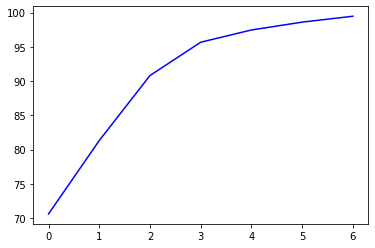

In [10]:
#Plot a variance plot for PCA components
plt.plot(cum_var, color ="blue")

In [ ]:
pca_values[:,0:2]
#so these are two components of pca. 

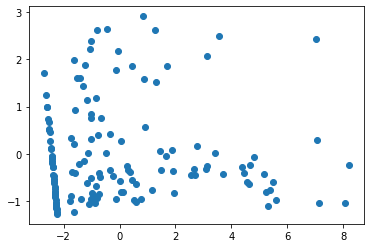

In [12]:
x = pca_values[:,0:1]
y = pca_values[:,1:2]

plt.scatter(x,y) # So this is PC1 and PC2

In [13]:
final_df = pd.concat([pd.DataFrame(pca_values[:,0:2], columns=["pc1","pc2"]), cricket[['PLAYER']]], axis=1)

final_df

,pc1,pc2,PLAYER
0,0.370843,-0.372853,Aaron Finch
1,5.299308,-1.089512,AB de Villiers
2,-0.886538,-1.033378,Abhishek Sharma
3,3.111495,-0.264452,Ajinkya Rahane
4,0.133748,-0.806728,Alex Hales
...,...,...,...
138,-2.694079,1.705253,Siddarth Kaul
139,-2.624655,1.256221,Trent Boult
140,-2.583515,0.990128,Umesh Yadav
141,-2.280965,-0.966764,Vi0y Kumar


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

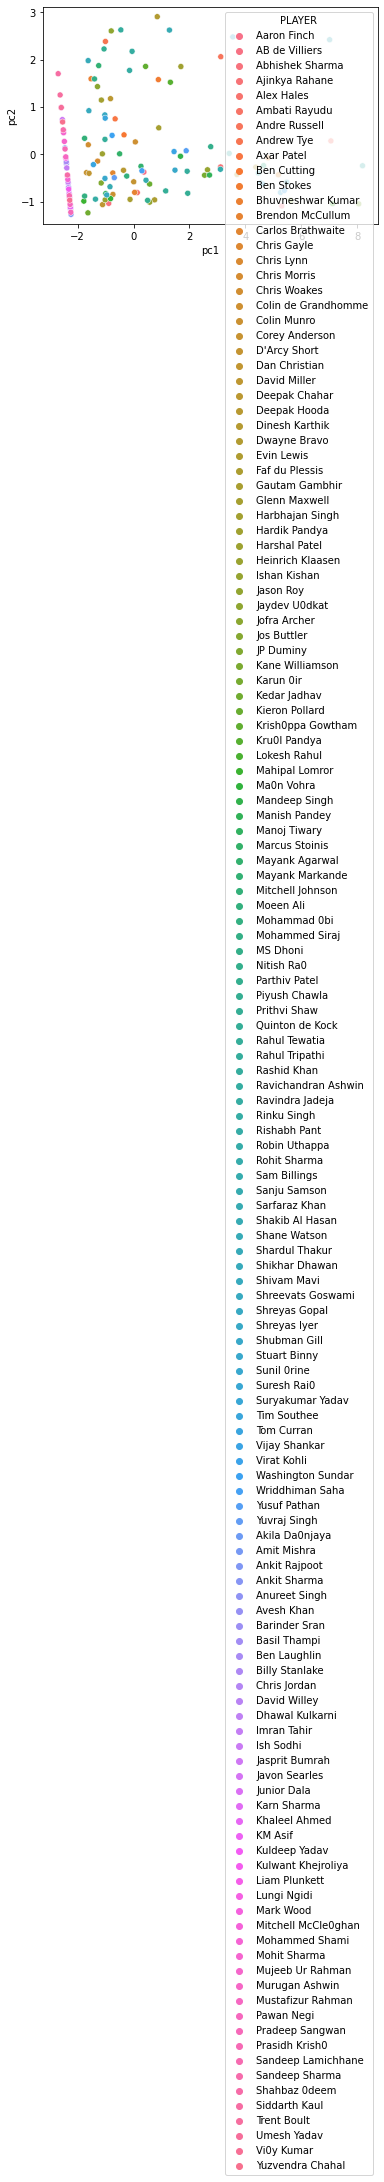

In [15]:
import seaborn as sns
sns.scatterplot(data= final_df, x='pc1', y = 'pc2', hue = 'PLAYER')